# Lending Club project

In [1]:
import pandas as pd
import numpy as np
import scipy as scipy
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
import multiprocessing

%matplotlib inline

## Loading Data

In [2]:
data = pd.read_csv('loansData.csv')
data.head(5)

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,81174,20000,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,99592,19200,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,80059,35000,35000.0,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,15825,10000,9975.0,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,33182,12000,12000.0,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


In [3]:
data['FICO.score.low'] = pd.to_numeric(data['FICO.Range'].str.split('-').str[0])
data['FICO.score.high'] =pd.to_numeric(data['FICO.Range'].str.split('-').str[1])
data['Interest.Rate'] = data['Interest.Rate'].str.replace('%','').astype(np.float64)

In [4]:
df =  data[['Amount.Requested','Amount.Funded.By.Investors','Interest.Rate','FICO.score.low','FICO.score.high']]
df.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,FICO.score.low,FICO.score.high
0,20000,20000.0,8.90,735,739
1,19200,19200.0,12.12,715,719
2,35000,35000.0,21.98,690,694
3,10000,9975.0,9.99,695,699
4,12000,12000.0,11.71,695,699


In [5]:
df.describe()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,FICO.score.low,FICO.score.high
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,12406.500000,12001.573236,13.066996,705.888000,709.888000
std,7801.544872,7745.320754,4.178230,35.033161,35.033161
min,1000.000000,-0.010000,5.420000,640.000000,644.000000
25%,6000.000000,6000.000000,10.160000,680.000000,684.000000
50%,10000.000000,10000.000000,13.110000,700.000000,704.000000
75%,17000.000000,16000.000000,15.800000,725.000000,729.000000
max,35000.000000,35000.000000,24.890000,830.000000,834.000000


<h2> 1.	Write a function called logistic_function that will take a FICO Score and a Loan Amount of this linear predictor, and return p. </h2>

In [20]:
FICO_score_low = df[df['FICO.score.low'] >= 720]
FICO_score_low.shape
FICO_score_high = df[df['FICO.score.high'] >= 720]
FICO_score_high.shape
print(FICO_score_low.shape,FICO_score_high.shape)

(822, 6) (822, 6)


<p> =>  use df['FICO.score.low'] to predict <p>

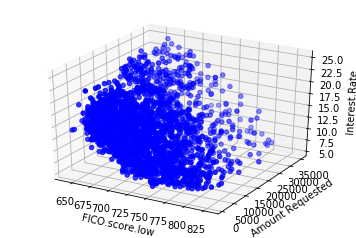

In [7]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['FICO.score.low'], df['Amount.Requested'],  df['Interest.Rate'], 
           c='blue')
ax.set_xlabel('FICO.score.low')
ax.set_ylabel('Amount Requested')
ax.set_zlabel('Interest.Rate')
plt.show()

In [8]:
X = df[['Amount.Requested', 'FICO.score.low']]
Y = df['Interest.Rate']
lr = linear_model.LinearRegression()
model = lr.fit(X,Y)
m = model.coef_
b = model.intercept_
print(m,b)

[ 0.00021075 -0.08844242] 72.8827983168


In [9]:
def logistic_function(loan_amount,fico_score, m0,m1, b):
    y = b + m0*loan_amount + m1*fico_score 
    p = 1./(1.+np.exp(-y))
    return p

In [10]:
p1 = logistic_function(10000, 750, m[0],m[1],b)
print("Probability that we can obtain a loan for $10,000 with a FICO score of 720")
print("p = ", p1)

Probability that we can obtain a loan for $10,000 with a FICO score of 720
p =  0.999826378515


In [11]:
print("Mean squared error: %.2f"
      % np.mean((model.predict(X) - Y) ** 2))

Mean squared error: 5.99


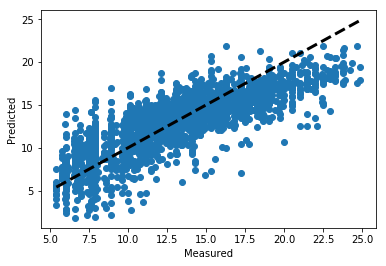

In [12]:
predicted = cross_val_predict(lr, X, Y,cv = 10)
fig, ax = plt.subplots()
ax.scatter(Y, predicted)
ax.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=3)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

<h3> 2.	Determine the probability that we can obtain a loan at ≤12% Interest for $10,000 with a FICO score of 720 using this function. </h3>

In [23]:
df['class'] = 1
df['class'][df['Interest.Rate'] > 12] = 0
df.head()

C:\Users\LeTrongTinh\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\LeTrongTinh\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\LeTrongTinh\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:5088: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-do

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,FICO.score.low,FICO.score.high,class
0,20000,20000.0,8.90,735,739,1
1,19200,19200.0,12.12,715,719,0
2,35000,35000.0,21.98,690,694,0
3,10000,9975.0,9.99,695,699,1
4,12000,12000.0,11.71,695,699,1


In [14]:
train=df.sample(frac=0.7,random_state=200)
test=df.drop(train.index)

In [18]:
log = linear_model.LogisticRegression(C=1e5)
X1 = train[['Amount.Requested', 'FICO.score.low']]
Y1 = train['class']
model1 = log.fit(X1,Y1)
m1 = model1.coef_
b1 = model1.intercept_
print(m1,b1)

[[ -7.62175935e-05   7.16779154e-04]] [-0.0005254]


In [16]:
model1.predict([[10000,750]])

array([0], dtype=int64)

In [19]:
X1_test = test[['Amount.Requested', 'FICO.score.low']]
Y1_test = test['class']
predicted1= cross_val_predict(log, X1_test, Y1_test, cv=10)
print (classification_report(Y1_test, predicted1))

             precision    recall  f1-score   support

          0       0.63      0.68      0.65       435
          1       0.50      0.45      0.47       315

avg / total       0.58      0.58      0.58       750

